In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install tld
!pip install pyarrow
!pip install Wikidata



In [1]:
!pip install pandas==1.0.5

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

parquet_path = '/content/drive/MyDrive/Project datasets/speaker_attributes.parquet'
speaker_attributes = pd.read_parquet(parquet_path)

In [5]:
wikidata_label_path = '/content/drive/MyDrive/Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2'
labels_df = pd.read_csv(wikidata_label_path, compression='bz2', index_col='QID')

In [6]:
dataset2020_csv_path= '/content/drive/MyDrive/ADA_Proj/quotes-2020-clean.csv'
df_2020 = pd.io.json.read_json(dataset2020_csv_path, lines=True, compression='bz2')

This is the already filtered 2020 dataset with only politicians quotes and with added columns from the wikidata parquet file

In [20]:
df_2020

,quotation,speaker,qids,date,party,academic_degree,nationality
0,[ Department of Homeland Security ] was livid ...,Sue Myrick,[Q367796],2020-01-16 12:00:13,[Q29468],[],[Q30]
1,[ These ] actions will allow households who ha...,Ben Carson,[Q816459],2020-03-19 19:14:00,"[Q29468, Q29552, Q327591, Q29468]",[Q913404],[Q30]
2,1. FM is entitled to go straight to press conf...,Paul Masterton,[Q30164281],2020-03-12 19:15:29,[Q3243587],[],[Q145]
3,a few of the candidates who will do better in ...,Dave Loebsack,[Q771586],2020-01-26 13:21:36,[Q29552],[],[Q30]
4,a host of other protections,Debbie Lesko,[Q16731415],2020-01-20 15:32:48,[Q29468],[],[Q30]
...,...,...,...,...,...,...,...
870410,You have to consider carefully when to adopt t...,Sebastian Kurz,[Q2262885],2020-03-08 13:58:49,[Q186867],[],[Q40]
870411,You say beti bachao beti padhao. But if the da...,Narendra Modi,[Q1058],2020-01-13 05:39:52,[Q10230],[],[Q668]
870412,You understood the structure of our story and ...,Bong Joon Ho,[Q495980],2020-02-02 08:27:01,[Q483462],[],[Q884]
870413,Your vote is your wisdom.,Jacob Osei Yeboah,[Q27916217],2020-01-22 10:33:19,[],[],[Q117]


**Let us dig into the distribution of the data that we have**


In [12]:
politicians_df=speaker_attributes[speaker_attributes['occupation'].apply(lambda x: False if x is None else 'Q82955' in x )]

In [14]:
print('Ratio of politicians in the wikidata parquet file is ',politicians_df.shape[0]/speaker_attributes.shape[0])

Ratio of politicians in the wikidata parquet file 0.07256706921094468


In [21]:
american_quotes= df_2020[df_2020['nationality'].apply(lambda x: False if x is None else 'Q30' in x )]
print('Ratio of american politicians quotes in 2020' ,american_quotes.shape[0]/df_2020.shape[0] )

Ratio of american politicians quotes in 2020 0.4815438612615821


In [24]:
with_known_degree=df_2020[df_2020['academic_degree'].apply(lambda x: False if (len(x) == 0) else True )]

print('Ratio of quotes with known academic degree of the author',with_known_degree.shape[0]/df_2020.shape[0])

Ratio of quotes with known academic degree of the author 0.18734396810716727


Text(0.5, 1.0, 'Party')

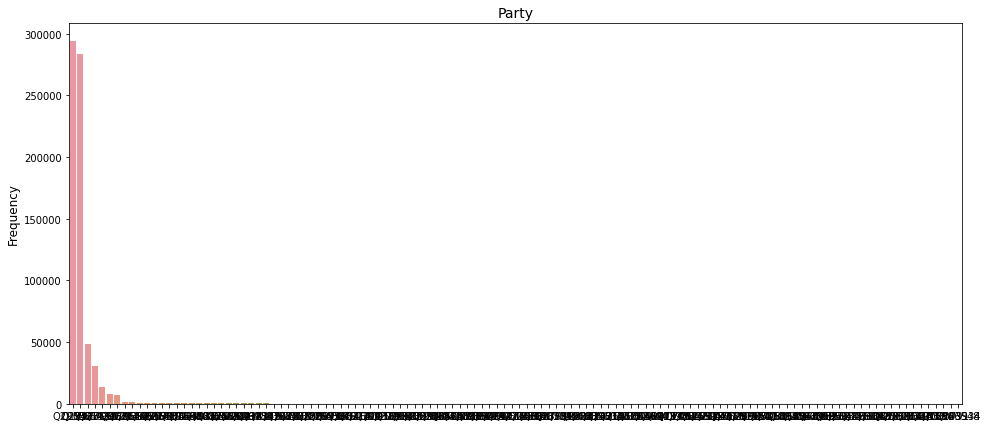

In [19]:
def adapt(series):
  return pd.Series([x for _list in series for x in _list])

fig, ax = plt.subplots(figsize = (16,7))
sns.barplot(x=adapt(american_quotes['party']).value_counts().index,
        y=adapt(american_quotes['party']).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Party", size = 14)

We can see that there is a dominance of two main parties which are the Democratic and Republican one.
Let us see the distribution of the these two compared to all the others.

The provided Data is clearely centered around the US and  trying to build a machine learning model that gives conclusions on the whole world would return a highely biased one since 50% of the political quotes are from US politicians. Hence we choose to base our study on the US.